In [33]:
import numpy as np
import xarray as xr
import os
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider
import cartopy.crs as ccrs
import dask
from datetime import date, timedelta
import pandas as pd

In [42]:
cost = xr.open_dataset('E:/Docs/studies/Delft/TestAnalysisSimulation/DT12/SOC_optimal/f00____________20181001_0000_airtraf_ac.nc')
climate = xr.open_dataset('E:/Docs/studies/Delft/TestAnalysisSimulation/DT12/AT20_optimal/f100___________20181001_0000_airtraf_ac.nc')

In [8]:
cost

<xarray.Dataset>
Dimensions:                      (AirTraf_properties: 16, AirTraf_routes_fp: 100, AirTraf_routes_out: 100, AirTraf_waypoints_out: 101, lat: 64, lon: 128, tbnds: 2, time: 30)
Coordinates:
  * time                         (time) datetime64[ns] 2018-04-01 ... 2018-04-30
  * lon                          (lon) float32 0.0 2.812 5.625 ... 354.4 357.2
  * lat                          (lat) float32 87.86 85.1 82.31 ... -85.1 -87.86
Dimensions without coordinates: AirTraf_properties, AirTraf_routes_fp, AirTraf_routes_out, AirTraf_waypoints_out, tbnds
Data variables: (12/18)
    YYYYMMDD                     (time) float64 ...
    dt                           (time) float64 ...
    nstep                        (time) float64 ...
    routes_out                   (time, AirTraf_routes_out, AirTraf_properties, AirTraf_waypoints_out) float32 ...
    routes_out_ave               (time, AirTraf_routes_out, AirTraf_properties, AirTraf_waypoints_out) float32 ...
    routes_flightplan_D_lon      (time, AirTraf_routes_fp) float32 ...
    ...                           ...
    routes_flightplan_A_lon_ave  (time, AirTraf_routes_fp) float32 ...
    routes_flightplan_A_lat      (time, AirTraf_routes_fp) float32 ...
    routes_flightplan_A_lat_ave  (time, AirTraf_routes_fp) float32 ...
    aps                          (time, lat, lon) float32 ...
    aps_ave                      (time, lat, lon) float32 ...
    time_bnds                    (time, tbnds) datetime64[ns] ...
Attributes: (12/49)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    channel_io_pe:            0
    channel_time_slo:         171360.0
    channel_name:             airtraf_ac
    channel_file_type:        output
    channel_file_name:        f00____________20180401_0000_airtraf_ac.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

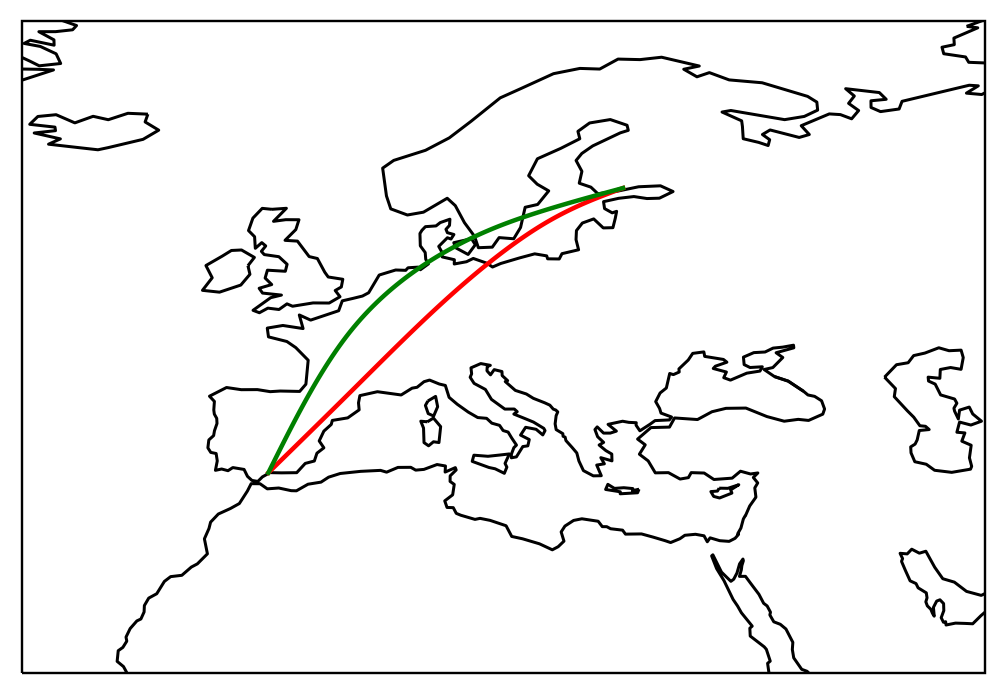

In [49]:
i_cost = 35
i_climate = 35
time = '2018-10-3'
# time = 0
lon = cost['routes_out'].sel(time = time).isel(AirTraf_routes_out=i_cost, AirTraf_properties=0).data
lat = cost['routes_out'].sel(time = time).isel( AirTraf_routes_out=i_cost, AirTraf_properties=1).data

lon_clim = climate['routes_out'].sel(time = time).isel(AirTraf_routes_out=i_climate, AirTraf_properties=0).data
lat_clim = climate['routes_out'].sel(time = time).isel( AirTraf_routes_out=i_climate, AirTraf_properties=1).data

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
extent = [-25, 55, 20, 70]
ax.set_extent(extent)

plt.plot(lon, lat, transform=ccrs.PlateCarree(), color='r')
plt.plot(lon_clim, lat_clim, transform=ccrs.PlateCarree(), color='g')

In [2]:
columns = ['month', 'day', 'time', 'i_cost', 'i_1p', 'i_climate', 'abs_comp', 'abs_opt', 'rel_comp', 'rel_opt']
gerben = pd.read_csv('gerben_output/aa_high_potential_list_sorted_rel_climate.txt', header=None, names=columns)
gerben

,month,day,time,i_cost,i_1p,i_climate,abs_comp,abs_opt,rel_comp,rel_opt
0,1,9,1,34,34,34,-1.414993e-10,-7.821983e-10,-96.028550,-530.83920
1,11,12,1,92,92,92,-4.218467e-10,-4.218467e-10,-408.421420,-408.42142
2,1,26,1,17,17,17,-5.250621e-10,-6.598233e-10,-224.490200,-282.10733
3,10,29,1,80,80,80,-3.755814e-10,-3.755814e-10,-226.447390,-226.44739
4,1,25,1,25,25,25,-8.285606e-10,-8.285606e-10,-197.458820,-197.45882
...,...,...,...,...,...,...,...,...,...,...
72995,3,17,1,69,69,69,-3.354281e-10,-7.142187e-10,32.639935,69.49940
72996,11,12,1,0,0,1,-5.603574e-10,-6.281379e-10,71.277160,79.89880
72997,4,24,1,24,24,24,-2.296050e-11,-2.626276e-10,7.222930,82.61758
72998,4,24,1,36,36,36,-1.041437e-10,-2.686431e-10,58.749146,151.54590


In [5]:
gerben_midnight = gerben[gerben['time'] == 0]
gerben_midnight

,month,day,time,i_cost,i_1p,i_climate,abs_comp,abs_opt,rel_comp,rel_opt
5021,6,18,0,8,8,8,-3.445355e-12,-1.819136e-10,-0.016560,-0.874384
5046,6,18,0,38,38,38,-2.953332e-12,-1.709337e-10,-0.015069,-0.872151
5217,10,14,0,60,60,60,-1.368612e-09,-1.392824e-09,-0.843021,-0.857934
5486,6,21,0,54,54,54,-1.451088e-09,-1.610233e-09,-0.755598,-0.838467
5717,6,10,0,38,38,38,-4.073535e-11,-1.796238e-10,-0.186795,-0.823679
...,...,...,...,...,...,...,...,...,...,...
72625,4,21,0,6,6,6,0.000000e+00,0.000000e+00,0.000000,0.000000
72628,7,16,0,76,76,76,0.000000e+00,0.000000e+00,0.000000,0.000000
72629,8,8,0,36,36,36,0.000000e+00,0.000000e+00,0.000000,0.000000
72630,10,3,0,80,80,80,0.000000e+00,0.000000e+00,0.000000,0.000000


In [39]:
gerben_midnight_500 = gerben_midnight.sort_values(by='rel_opt').head(500)
index_list_cost = []
index_list_climate = []
date_list = []
# test = date(2018, gerben_midnight_500['month'].values[0], gerben_midnight_500['day'].values[0])
# str(test)
gerben_midnight_500['month'].values

array([ 6,  6, 10,  6,  6,  8,  7,  7,  8,  8,  8,  8, 10,  7,  7, 10,  9,
        8,  8,  7,  8,  8,  7,  8, 12,  8,  8, 10,  8,  8,  6,  8,  8,  8,
        8,  3,  8,  8,  8,  8,  8,  8,  9,  8,  8,  8,  8,  8,  8,  8,  7,
        8,  8,  8,  7,  8,  8,  8,  9,  8,  8,  7,  8,  6,  8,  8,  8,  9,
        8,  8,  8,  6,  8,  8,  9,  8,  6,  8,  8,  7,  8,  8,  9,  8,  6,
        8,  9,  8,  7,  8,  8,  8,  8,  6, 11,  9,  8,  9,  8, 11,  8,  8,
        2,  8, 12,  7,  9,  8,  8,  8,  8,  8,  8,  9,  6,  7,  7,  8, 10,
        6,  8,  6,  7,  9,  8,  7,  8,  9, 10,  8,  8,  9,  9,  8,  6,  6,
        8,  6,  6,  6,  7,  9,  6,  9,  8,  8,  8,  9,  7,  8,  8,  9,  8,
        8,  8,  8,  7,  8,  8, 12,  8,  8,  8,  8,  3,  8,  8,  1,  8,  6,
        9,  9,  8,  7,  7,  8,  7,  8,  7,  7,  7,  6,  9,  1,  6,  6,  7,
        8,  9,  9,  8,  8,  9,  8,  6,  9,  6, 10,  8,  9,  8, 10,  7,  8,
        8,  8,  8,  8,  9,  6,  8,  7,  8,  9, 10,  8, 10,  8, 10, 12,  8,
        9,  8, 12,  9,  8